# Partie 1 : AE-CNN sur données propres

## 1.1 Importation des modules

In [1]:
# On importe les librairies nécessaires
import os
# Le dataset MNIST
from tensorflow.keras.datasets import mnist

# Les librairies TF pour le DL
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential

# Les librairies habituelles
import numpy as np
import matplotlib.pyplot as plt

# On configure la session pour l'utilisation de GPU
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')

## 1.2 Définition de fonctions nécessaires

In [2]:
def MNIST_AE_disp(img_in, img_out, img_idx):

    num_img = len(img_idx)
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(img_idx):
        # on trace l'image originale
        ax = plt.subplot(2, num_img, i + 1)
        plt.imshow(img_in[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # on trace l'image bruitée
        ax = plt.subplot(2, num_img, num_img + i + 1)
        plt.imshow(img_out[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


## 1.3 Chargement et formatage des données (propres)

In [3]:
# On charge les données de MNIST (incluses dans Keras)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# On normalise les valeurs des pixels de [0, 255] à [0, 1]
x_train=x_train.astype('float32')/float(x_train.max())
x_test=x_test.astype('float32')/float(x_test.max())

# POUR LES CNN : On rajoute une dimension pour spécifier qu'il s'agit d'imgages en NdG
x_train=x_train.reshape(len(x_train),x_train.shape[1], x_train.shape[2], 1)
x_test=x_test.reshape(len(x_test),x_test.shape[1], x_test.shape[2], 1)

# On inspecte les dimensions de nos données
# Base d'entrainement : 60,000 images de dimension (28,28)
# Base de test : 10,000 images de dimension (28,28)
print("Training set : ",x_train.shape)
print("Testing set : ",x_test.shape)

Training set :  (60000, 28, 28, 1)
Testing set :  (10000, 28, 28, 1)


## 1.4 Création du réseau CNN

In [4]:
autoencoder = Sequential([Conv2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1),padding='same'),
                MaxPooling2D(padding='same'), Conv2D(filters=8,kernel_size=(3,3),padding='same'),
                     MaxPooling2D(padding='same'), Conv2D(filters=16,kernel_size=(3,3),padding='same'),
                     UpSampling2D(), Conv2D(filters=1,kernel_size=(3,3),padding='same'),
                     UpSampling2D()])


## 1.5 Apprentissage du réseau

In [5]:
loss_object = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam()
autoencoder.compile(optimizer,loss_object)

In [6]:
autoencoder.fit(x_train,x_train,batch_size=256,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1944
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1520
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1576
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1433
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1411


## 1.6 Prédiction par le réseau

In [7]:
# On génère un jeu de 10 images test au hasard
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test.shape[0], size=num_images)

# On détermine l'image encodée et l'image décodée
decoded_img=autoencoder.predict(x_test)

## 1.7 Visualisation

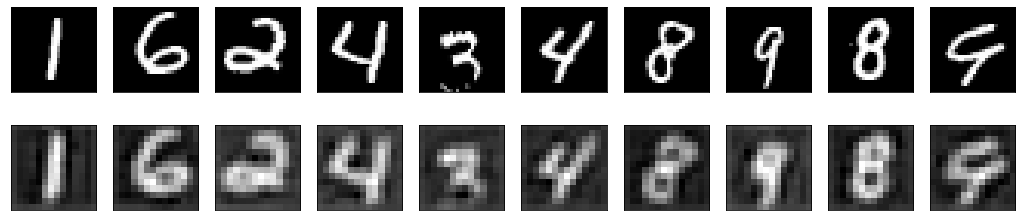

In [8]:
MNIST_AE_disp(x_test, decoded_img, random_test_images)

# Partie 2 : Vers le Denoising AE

## 2.1 Création des données bruitées

In [9]:
mean = 0
var = 2
coef_bruit = 0.3
gaussian = np.random.normal(mean,var,(28,28,1))
x_train_noisy = x_train + coef_bruit*gaussian

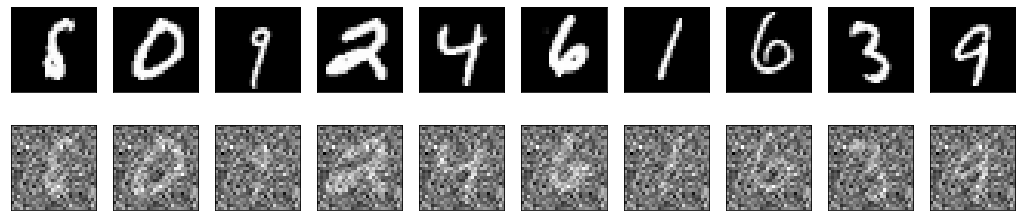

In [10]:
MNIST_AE_disp(x_train, x_train_noisy, random_test_images)

## 2.2 Prédictions à partir des données bruitées

In [11]:
decoded_noisy_img = autoencoder.predict(x_train_noisy)

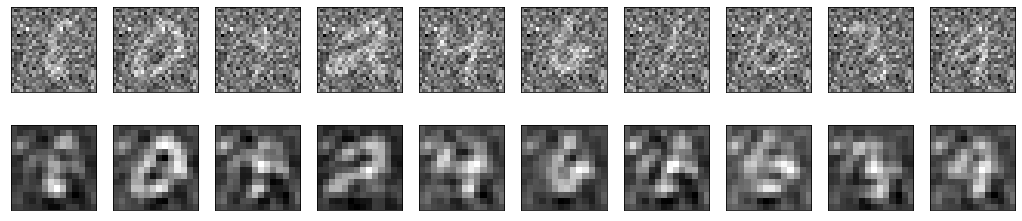

In [12]:
MNIST_AE_disp(x_train_noisy, decoded_noisy_img, random_test_images)

## 2.3 Apprentissage du réseaux DAE

In [13]:
autoencoder.fit(x_train_noisy,x_train,batch_size=256,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2669
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1803
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1617
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1571
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1502


## 2.4 Prédiction et visualisation à partir des données bruitées

In [14]:
decoded_noisy_img = autoencoder.predict(x_train_noisy)

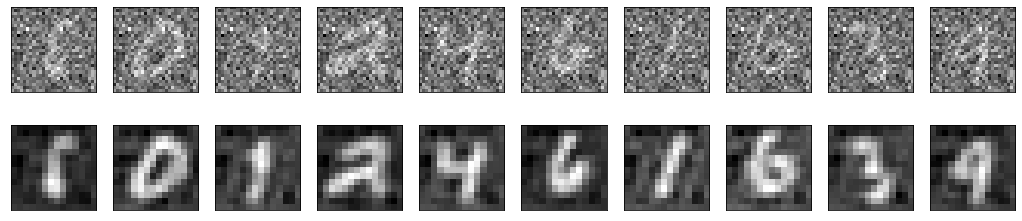

In [15]:
MNIST_AE_disp(x_train_noisy, decoded_noisy_img, random_test_images)